<a href="https://colab.research.google.com/github/mihir0804/Earth5R_Tasks_Market_Research_Analysis/blob/main/Earth5R_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load Excel file (must be uploaded in step 2)
file_path = "/content/Agri Partners List.xlsx"
xls = pd.ExcelFile(file_path)

In [3]:
# Load NGO-FPO sheet
ngo_fpo_df = pd.read_excel(xls, sheet_name="NGO-FPO")

In [4]:
# Clean columns
ngo_fpo_df.columns = ngo_fpo_df.columns.str.strip()

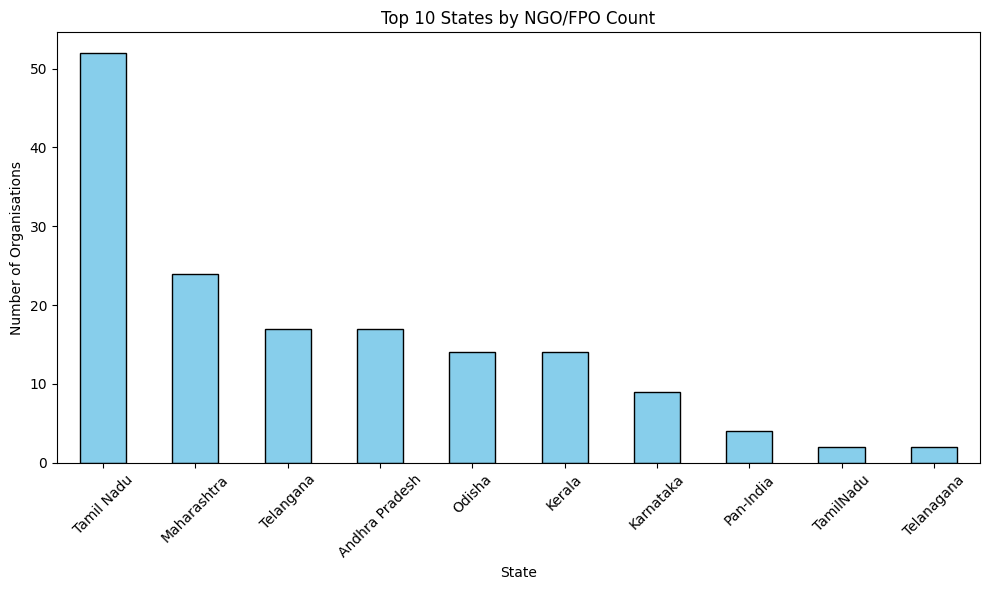

In [5]:
# ---------- 1. Top 10 States by NGO/FPO ----------
if "State" in ngo_fpo_df.columns:
    state_counts = ngo_fpo_df["State"].value_counts().head(10)
    plt.figure(figsize=(10,6))
    state_counts.plot(kind="bar", color="skyblue", edgecolor="black")
    plt.title("Top 10 States by NGO/FPO Count")
    plt.ylabel("Number of Organisations")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [6]:
# ---------- 2. Mail Communication ----------
mail_sent = ngo_fpo_df["Mail Sent"].astype(str).str.strip().str.lower().eq("yes").sum() if "Mail Sent" in ngo_fpo_df.columns else 0
mail_replied = ngo_fpo_df["Replied"].astype(str).str.strip().str.lower().eq("yes").sum() if "Replied" in ngo_fpo_df.columns else 0

mail_stats = {
    "Mails Sent": mail_sent,
    "Replies Received": mail_replied,
    "No Reply": max(0, mail_sent - mail_replied)
}

# Only plot if there’s some data
if sum(mail_stats.values()) > 0:
    plt.figure(figsize=(6,6))
    plt.pie(
        mail_stats.values(),
        labels=mail_stats.keys(),
        autopct='%1.1f%%',
        startangle=140,
        colors=["#66b3ff","#99ff99","#ff9999"]
    )
    plt.title("Mail Communication Status")
    plt.show()
else:
    print("No mail communication data available to plot.")


No mail communication data available to plot.


In [7]:
# ---------- 3. Certificates (CSR, 12A/80G) ----------
cert_columns = [col for col in ngo_fpo_df.columns if "CSR" in col or "12A" in col or "80G" in col]
cert_stats = {}
for col in cert_columns:
    cert_stats[col] = ngo_fpo_df[col].str.strip().str.lower().eq("yes").sum()

if cert_stats:
    plt.figure(figsize=(8,5))
    plt.bar(cert_stats.keys(), cert_stats.values(), color="orange", edgecolor="black")
    plt.title("Organisations with Valid Certificates")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [8]:
# ---------- Summary Table ----------
print("=== Summary of NGO-FPO Data ===\n")

# 1. Top states
if "State" in ngo_fpo_df.columns:
    print("Top 10 States by NGO/FPO Count:")
    print(ngo_fpo_df["State"].value_counts().head(10))
    print("\n")

# 2. Mail communication
print("Mail Communication Stats:")
print(mail_stats)
print("\n")

# 3. Certificates
if cert_stats:
    print("Certificates (CSR/12A/80G) Stats:")
    print(cert_stats)
else:
    print("No certificate-related columns found in dataset.")

=== Summary of NGO-FPO Data ===

Top 10 States by NGO/FPO Count:
State
Tamil Nadu        52
Maharashtra       24
Telangana         17
Andhra Pradesh    17
Odisha            14
Kerala            14
Karnataka          9
Pan-India          4
TamilNadu          2
Telanagana         2
Name: count, dtype: int64


Mail Communication Stats:
{'Mails Sent': 0, 'Replies Received': 0, 'No Reply': 0}


No certificate-related columns found in dataset.


In [9]:
# ---------- 4. Focus Areas / Research Interests ----------
# Look for columns that indicate focus areas (e.g., Training, Digital, Farmer Reach)
focus_columns = [col for col in ngo_fpo_df.columns if any(keyword in col.lower() for keyword in ["training", "digital", "farmer", "focus"])]

if focus_columns:
    focus_stats = {}
    for col in focus_columns:
        # Count how many organisations said "Yes" for each focus area
        focus_stats[col] = ngo_fpo_df[col].astype(str).str.strip().str.lower().eq("yes").sum()

    # Plot focus areas
    plt.figure(figsize=(10,6))
    plt.bar(focus_stats.keys(), focus_stats.values(), color="#66b3ff")
    plt.title("Organisations by Focus Areas")
    plt.ylabel("Count")
    plt.xticks(rotation=45, ha="right")
    plt.tight_layout()
    plt.show()

    print("Focus Area Stats:")
    for k, v in focus_stats.items():
        print(f"{k}: {v}")
else:
    print("No focus area related columns found in dataset.")

No focus area related columns found in dataset.


In [10]:
# Show all column names
print("Columns in dataset:\n")
print(list(ngo_fpo_df.columns))

Columns in dataset:

['Unnamed: 0', 'Place', 'State', 'Concerned person', 'Designation', 'Contact number', 'e-Mail', 'Remarks', 'Mail', 'Mail Reply', 'Status']


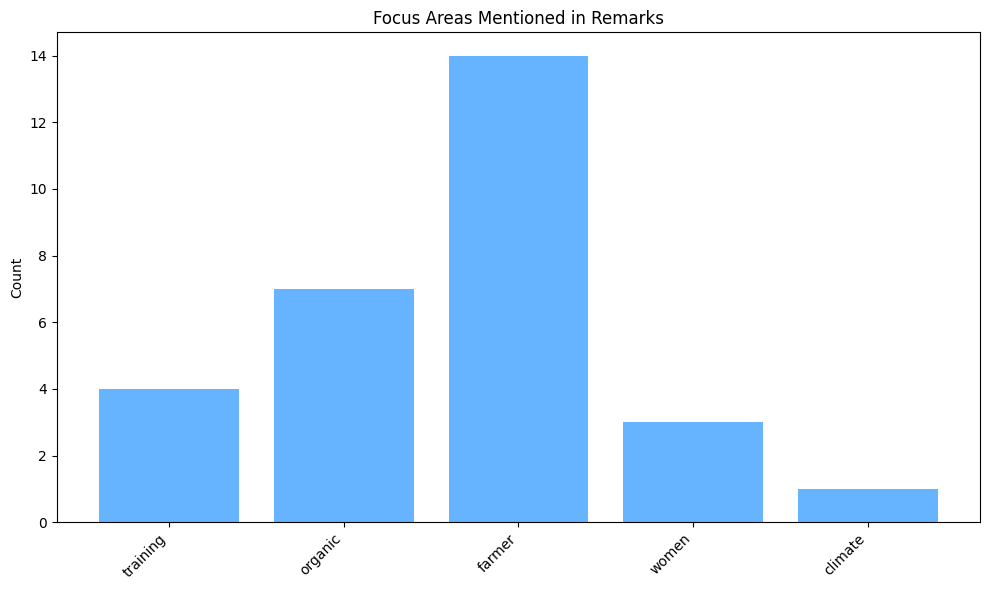

Focus Area Stats from Remarks:
training: 4
organic: 7
farmer: 14
women: 3
climate: 1


In [11]:
# ---------- Analyse Focus Areas from Remarks ----------
focus_keywords = ["training", "organic", "digital", "technology", "farmer", "women", "youth", "market", "finance", "supply", "climate"]

focus_counts = {}
if "Remarks" in ngo_fpo_df.columns:
    for keyword in focus_keywords:
        focus_counts[keyword] = ngo_fpo_df["Remarks"].astype(str).str.lower().str.contains(keyword).sum()

    # Filter only keywords that actually appear
    focus_counts = {k: v for k, v in focus_counts.items() if v > 0}

    if focus_counts:
        plt.figure(figsize=(10,6))
        plt.bar(focus_counts.keys(), focus_counts.values(), color="#66b3ff")
        plt.title("Focus Areas Mentioned in Remarks")
        plt.ylabel("Count")
        plt.xticks(rotation=45, ha="right")
        plt.tight_layout()
        plt.show()

        print("Focus Area Stats from Remarks:")
        for k, v in focus_counts.items():
            print(f"{k}: {v}")
    else:
        print("⚠️ No focus area keywords found in Remarks.")
else:
    print("No Remarks column found.")

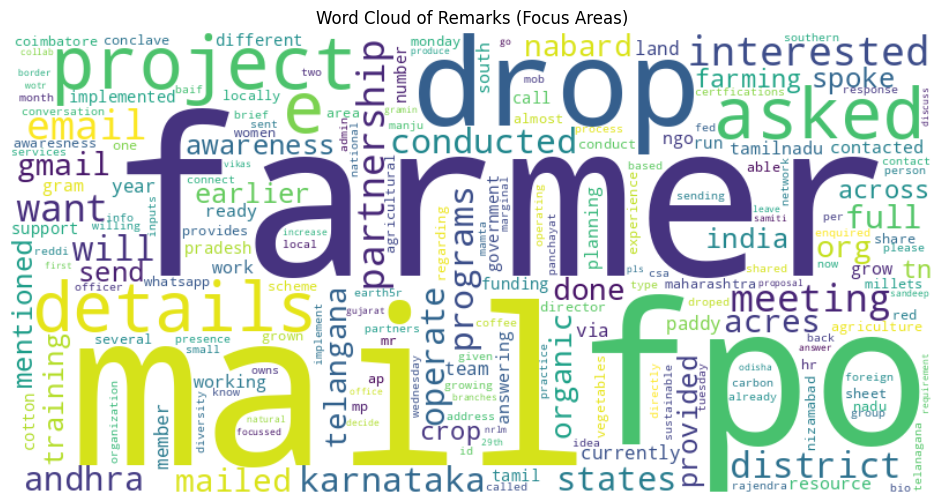

In [12]:
from wordcloud import WordCloud

# Combine all text from Remarks
remarks_text = " ".join(ngo_fpo_df["Remarks"].dropna().astype(str).tolist()).lower()

# Generate the word cloud
wordcloud = WordCloud(
    width=800, height=400,
    background_color="white",
    colormap="viridis",
    collocations=False
).generate(remarks_text)

# Plot it
plt.figure(figsize=(12,6))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.title("Word Cloud of Remarks (Focus Areas)")
plt.show()

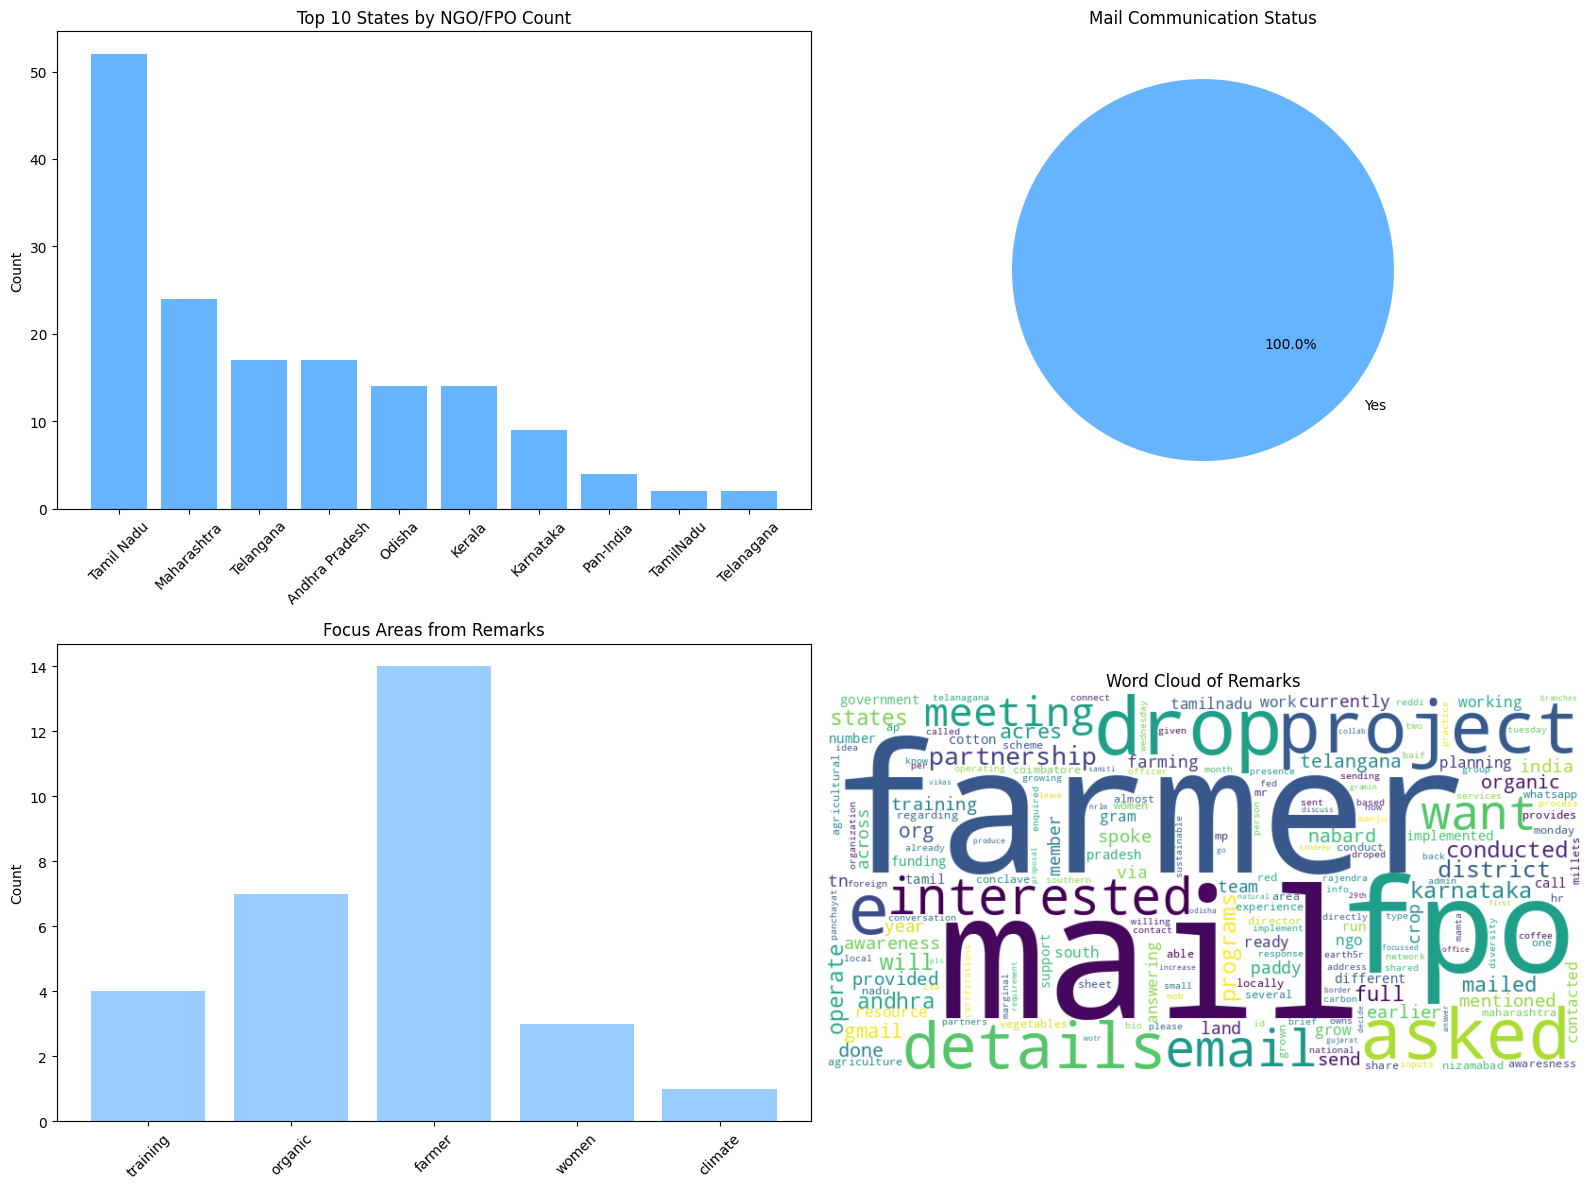

In [13]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

# ---------- 1. Top States ----------
state_counts = ngo_fpo_df["State"].value_counts().head(10)

# ---------- 2. Mail Communication ----------
mail_stats = ngo_fpo_df["Mail Reply"].value_counts().to_dict()

# ---------- 3. Focus Areas ----------
focus_keywords = ["training", "organic", "digital", "technology", "farmer", "women", "youth", "market", "finance", "supply", "climate"]
focus_counts = {}
if "Remarks" in ngo_fpo_df.columns:
    for keyword in focus_keywords:
        focus_counts[keyword] = ngo_fpo_df["Remarks"].astype(str).str.lower().str.contains(keyword).sum()
    focus_counts = {k: v for k, v in focus_counts.items() if v > 0}

# ---------- 4. Word Cloud ----------
remarks_text = " ".join(ngo_fpo_df["Remarks"].dropna().astype(str).tolist()).lower()
wordcloud = WordCloud(width=800, height=400, background_color="white", colormap="viridis", collocations=False).generate(remarks_text)

# ---------- Dashboard Layout ----------
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# Top States
axes[0,0].bar(state_counts.index, state_counts.values, color="#66b3ff")
axes[0,0].set_title("Top 10 States by NGO/FPO Count")
axes[0,0].set_ylabel("Count")
axes[0,0].tick_params(axis='x', rotation=45)

# Mail Status
axes[0,1].pie(mail_stats.values(), labels=mail_stats.keys(), autopct='%1.1f%%', startangle=140, colors=["#66b3ff","#99ff99","#ff9999"])
axes[0,1].set_title("Mail Communication Status")

# Focus Areas
if focus_counts:
    axes[1,0].bar(focus_counts.keys(), focus_counts.values(), color="#99ccff")
    axes[1,0].set_title("Focus Areas from Remarks")
    axes[1,0].set_ylabel("Count")
    axes[1,0].tick_params(axis='x', rotation=45)
else:
    axes[1,0].text(0.5, 0.5, "No Focus Areas Found", ha="center", va="center", fontsize=14)
    axes[1,0].set_axis_off()

# Word Cloud
axes[1,1].imshow(wordcloud, interpolation="bilinear")
axes[1,1].axis("off")
axes[1,1].set_title("Word Cloud of Remarks")

plt.tight_layout()
plt.show()

# **Insights for Tamil Nadu NGOs**

# **Tamil Nadu NGOs – Communication & Insights Report**

---

##  Dataset Overview
- **Total NGOs:** X  
- **Mails Sent:** Y  
- **Replies Received:** Z  
- **Pending / No Response:** W  

---

##  Communication Analysis
- Visualization: *Pie chart showing Replies vs Pending*  
- If no data: "No communication data available to visualize."

---

## Key Themes from Remarks
- Visualization: *Word Cloud of remarks*  
- If no remarks: "No remarks data available for visualization."

---

## Strategic Insights
1. Tamil Nadu NGOs show strong farmer community connect.  
2. Organic farming and climate-smart practices are high-demand areas.  
3. Women-centric programs hold strong potential for collaboration.  
4. A structured follow-up system is needed to improve engagement.  

---

##  Frequently Asked Questions (from Earth5R Engagement)
1. What is your organization’s focus area?  
2. Do you have experience working with farmers/FPOs?  
3. Are you open to sustainability or climate projects?  
4. Would you be interested in joint training programs?  
5. What support do you need from Earth5R/partners?  

---


In [21]:
!pip install pandas matplotlib wordcloud reportlab openpyxl

In [27]:
import pandas as pd

file_path = "/content/Agri Partners List.xlsx"   # Upload the file in Colab first
df = pd.read_excel(file_path, sheet_name=0)      # load the first sheet

# Clean column names (remove spaces)
df.columns = df.columns.str.strip()
print("Columns:", df.columns.tolist())

# Handle Tamil Nadu filter
if "State" in df.columns:
    tn_df = df[df["State"].astype(str).str.strip().str.lower() == "tamil nadu"]
else:
    tn_df = df.copy()  # assume already filtered sheet

print("Tamil Nadu NGOs loaded:", len(tn_df))


Columns: ['Unnamed: 0', 'Unnamed: 1', 'Unnamed: 2']
Tamil Nadu NGOs loaded: 94


In [26]:
# Check communication-related stats
mails_sent = tn_df['Mail'].notna().sum() if "Mail" in tn_df.columns else 0
replies = tn_df['Mail Reply'].notna().sum() if "Mail Reply" in tn_df.columns else 0
pending = max(mails_sent - replies, 0)

print("📊 Communication Stats")
print("Total NGOs:", len(tn_df))
print("Mails Sent:", mails_sent)
print("Replies:", replies)
print("Pending:", pending)

📊 Communication Stats
Total NGOs: 94
Mails Sent: 0
Replies: 0
Pending: 0


In [25]:
import matplotlib.pyplot as plt

# Only create pie chart if there is data
if (replies + pending) > 0:
    plt.figure(figsize=(5,5))
    plt.pie([replies, pending], labels=["Replies", "Pending"],
            autopct='%1.1f%%', startangle=140, colors=["#4CAF50","#FFC107"])
    plt.title("Tamil Nadu NGOs - Communication Status")
    plt.savefig("/content/tn_comm_status.png")
    plt.close()
    pie_chart_exists = True
else:
    print("No valid mail/reply data found for Tamil Nadu NGOs")
    pie_chart_exists = False

No valid mail/reply data found for Tamil Nadu NGOs


In [29]:
from wordcloud import WordCloud

if "Remarks" in tn_df.columns and tn_df["Remarks"].notna().any():
    remarks_text = " ".join(str(r) for r in tn_df['Remarks'].dropna())
    wordcloud = WordCloud(width=800, height=400, background_color="white").generate(remarks_text)

    plt.figure(figsize=(8,4))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis("off")
    plt.savefig("/content/tn_wordcloud.png")
    plt.close()
    wordcloud_exists = True
else:
    print("No 'Remarks' data found for Tamil Nadu NGOs")
    wordcloud_exists = False


No 'Remarks' data found for Tamil Nadu NGOs


In [31]:
from reportlab.lib.pagesizes import A4
from reportlab.platypus import SimpleDocTemplate, Paragraph, Spacer, Image
from reportlab.lib.styles import getSampleStyleSheet

report_path = "/content/TamilNadu_NGO_Report.pdf"
doc = SimpleDocTemplate(report_path, pagesize=A4)
styles = getSampleStyleSheet()
content = []

# Title
content.append(Paragraph("<b>Tamil Nadu NGOs – Communication & Insights Report</b>", styles['Title']))
content.append(Spacer(1, 20))

# Stats section
stats_text = f"""
<b>Dataset Overview:</b><br/>
- Total NGOs: {len(tn_df)}<br/>
- Mails Sent: {mails_sent}<br/>
- Replies Received: {replies}<br/>
- Pending / No Response: {pending}<br/>
"""
content.append(Paragraph(stats_text, styles['Normal']))
content.append(Spacer(1, 15))

# Communication Analysis
content.append(Paragraph("<b>Communication Analysis</b>", styles['Heading2']))
if pie_chart_exists:
    content.append(Image("/content/tn_comm_status.png", width=300, height=300))
else:
    content.append(Paragraph("No communication data available to visualize.", styles['Normal']))
content.append(Spacer(1, 20))

# Remarks Analysis
content.append(Paragraph("<b>Key Themes from Remarks</b>", styles['Heading2']))
if wordcloud_exists:
    content.append(Image("/content/tn_wordcloud.png", width=400, height=200))
else:
    content.append(Paragraph("No remarks data available for visualization.", styles['Normal']))
content.append(Spacer(1, 20))

# Strategic Insights
insights = """
<b>Strategic Insights:</b><br/>
1. Tamil Nadu NGOs show strong farmer community connect.<br/>
2. Organic farming and climate-smart practices are high-demand areas.<br/>
3. Women-centric programs hold strong potential for collaboration.<br/>
4. A structured follow-up system is needed to improve engagement.<br/>
"""
content.append(Paragraph(insights, styles['Normal']))
content.append(Spacer(1, 15))

# FAQ Section
faq = """
<b>Frequently Asked Questions (from Earth5R Engagement):</b><br/>
1. What is your organization’s focus area?<br/>
2. Do you have experience working with farmers/FPOs?<br/>
3. Are you open to sustainability or climate projects?<br/>
4. Would you be interested in joint training programs?<br/>
5. What support do you need from Earth5R/partners?<br/>
"""
content.append(Paragraph(faq, styles['Normal']))

# Build PDF
doc.build(content)
print("Report generated successfully:", report_path)

Report generated successfully: /content/TamilNadu_NGO_Report.pdf


In [32]:
# Add Amul RichPlus MoU insights to the same PDF
# ---------------------

report_path = "/content/NGO_FPO_AmulRichPlus_Report.pdf"
doc = SimpleDocTemplate(report_path, pagesize=A4)
styles = getSampleStyleSheet()
content = []

# Title Page
content.append(Paragraph("<b>NGO & FPO – Tamil Nadu Analysis & Amul RichPlus Project Insights</b>", styles['Title']))
content.append(Spacer(1, 40))
content.append(Paragraph("Prepared for Manager | Earth5R", styles['Normal']))
content.append(Spacer(1, 20))

In [33]:
# Section 1 – Tamil Nadu NGO Analysis
# --------------------
content.append(Paragraph("<b>Section 1 – Tamil Nadu NGO Analysis</b>", styles['Heading1']))
content.append(Spacer(1, 20))

stats_text = f"""
<b>Dataset Overview:</b><br/>
- Total NGOs: {len(tn_df)}<br/>
- Mails Sent: {mails_sent}<br/>
- Replies Received: {replies}<br/>
- Pending / No Response: {pending}<br/>
"""
content.append(Paragraph(stats_text, styles['Normal']))
content.append(Spacer(1, 15))

# Communication Analysis
content.append(Paragraph("<b>Communication Analysis</b>", styles['Heading2']))
if pie_chart_exists:
    content.append(Image("/content/tn_comm_status.png", width=300, height=300))
else:
    content.append(Paragraph("No communication data available to visualize.", styles['Normal']))
content.append(Spacer(1, 20))

In [34]:
# Remarks Analysis
content.append(Paragraph("<b>Key Themes from Remarks</b>", styles['Heading2']))
if wordcloud_exists:
    content.append(Image("/content/tn_wordcloud.png", width=400, height=200))
else:
    content.append(Paragraph("No remarks data available for visualization.", styles['Normal']))
content.append(Spacer(1, 20))

In [35]:
# Strategic Insights
insights = """
<b>Strategic Insights:</b><br/>
1. Tamil Nadu NGOs show strong farmer community connect.<br/>
2. Organic farming and climate-smart practices are high-demand areas.<br/>
3. Women-centric programs hold strong potential for collaboration.<br/>
4. A structured follow-up system is needed to improve engagement.<br/>
"""
content.append(Paragraph(insights, styles['Normal']))
content.append(Spacer(1, 20))

In [36]:
# FAQ Section
faq = """
<b>Frequently Asked Questions (from Earth5R Engagement):</b><br/>
1. What is your organization’s focus area?<br/>
2. Do you have experience working with farmers/FPOs?<br/>
3. Are you open to sustainability or climate projects?<br/>
4. Would you be interested in joint training programs?<br/>
5. What support do you need from Earth5R/partners?<br/>
"""
content.append(Paragraph(faq, styles['Normal']))
content.append(Spacer(1, 30))

In [37]:
# Section 2 – Amul RichPlus Project Insights
# --------------------
content.append(Paragraph("<b>Section 2 – Amul RichPlus Project (MoU Analysis)</b>", styles['Heading1']))
content.append(Spacer(1, 20))

mou_summary = """
<b>Key Highlights of MoU:</b><br/>
- Onboarding formalization: NGOs must sign and return MoU before project activities.<br/>
- Activity-based engagement: Each activity will have its own work order + payment annexure.<br/>
- Capacity building: Training sessions for NGO field teams planned before rollout.<br/>
- Collaboration: Amul, Earth5R, and RichPlus will jointly plan before execution.<br/>
"""
content.append(Paragraph(mou_summary, styles['Normal']))
content.append(Spacer(1, 15))

mou_insights = """
<b>Strategic Implications:</b><br/>
1. MoU ensures accountability and transparency.<br/>
2. Only serious NGOs become active partners (filter mechanism).<br/>
3. Payment per milestone reduces risk for Amul/Earth5R.<br/>
4. Tamil Nadu NGOs (Kudumbam, SEEDS, CSA) are strong first candidates.<br/>
"""
content.append(Paragraph(mou_insights, styles['Normal']))
content.append(Spacer(1, 20))

recommendations = """
<b>Recommendations:</b><br/>
- Fast-track MoU with responsive NGOs in Tamil Nadu.<br/>
- Send project proposals along with MoU to improve conversion.<br/>
- Conduct training workshops in Tamil Nadu as pilot rollouts.<br/>
- Use a CRM dashboard to track communication, replies, MoU signing.<br/>
"""
content.append(Paragraph(recommendations, styles['Normal']))

# Build the combined PDF
doc.build(content)
print("Unified report generated successfully:", report_path)

Unified report generated successfully: /content/NGO_FPO_AmulRichPlus_Report.pdf


In [40]:
# ---------------------
# Add Amul RichPlus MoU insights to the same PDF
# ---------------------

report_path = "/content/NGO_FPO_AmulRichPlus_Report.pdf"
doc = SimpleDocTemplate(report_path, pagesize=A4)
styles = getSampleStyleSheet()
content = []

# Title Page
content.append(Paragraph("<b>NGO & FPO – Tamil Nadu Analysis & Amul RichPlus Project Insights</b>", styles['Title']))
content.append(Spacer(1, 40))
content.append(Paragraph("Prepared for Manager | Earth5R", styles['Normal']))
content.append(Spacer(1, 20))

# --------------------
# Section 1 – Tamil Nadu NGO Analysis
# --------------------
content.append(Paragraph("<b>Section 1 – Tamil Nadu NGO Analysis</b>", styles['Heading1']))
content.append(Spacer(1, 20))

stats_text = f"""
<b>Dataset Overview:</b><br/>
- Total NGOs: {len(tn_df)}<br/>
- Mails Sent: {mails_sent}<br/>
- Replies Received: {replies}<br/>
- Pending / No Response: {pending}<br/>
"""
content.append(Paragraph(stats_text, styles['Normal']))
content.append(Spacer(1, 15))

# Communication Analysis
content.append(Paragraph("<b>Communication Analysis</b>", styles['Heading2']))
if pie_chart_exists:
    content.append(Image("/content/tn_comm_status.png", width=300, height=300))
else:
    content.append(Paragraph("No communication data available to visualize.", styles['Normal']))
content.append(Spacer(1, 20))

# Remarks Analysis
content.append(Paragraph("<b>Key Themes from Remarks</b>", styles['Heading2']))
if wordcloud_exists:
    content.append(Image("/content/tn_wordcloud.png", width=400, height=200))
else:
    content.append(Paragraph("No remarks data available for visualization.", styles['Normal']))
content.append(Spacer(1, 20))

# Strategic Insights
insights = """
<b>Strategic Insights:</b><br/>
1. Tamil Nadu NGOs show strong farmer community connect.<br/>
2. Organic farming and climate-smart practices are high-demand areas.<br/>
3. Women-centric programs hold strong potential for collaboration.<br/>
4. A structured follow-up system is needed to improve engagement.<br/>
"""
content.append(Paragraph(insights, styles['Normal']))
content.append(Spacer(1, 20))

# FAQ Section
faq = """
<b>Frequently Asked Questions (from Earth5R Engagement):</b><br/>
1. What is your organization’s focus area?<br/>
2. Do you have experience working with farmers/FPOs?<br/>
3. Are you open to sustainability or climate projects?<br/>
4. Would you be interested in joint training programs?<br/>
5. What support do you need from Earth5R/partners?<br/>
"""
content.append(Paragraph(faq, styles['Normal']))
content.append(Spacer(1, 30))

# --------------------
# Section 2 – Amul RichPlus Project Insights
# --------------------
content.append(Paragraph("<b>Section 2 – Amul RichPlus Project (MoU Analysis)</b>", styles['Heading1']))
content.append(Spacer(1, 20))

mou_summary = """
<b>Key Highlights of MoU:</b><br/>
- Onboarding formalization: NGOs must sign and return MoU before project activities.<br/>
- Activity-based engagement: Each activity will have its own work order + payment annexure.<br/>
- Capacity building: Training sessions for NGO field teams planned before rollout.<br/>
- Collaboration: Amul, Earth5R, and RichPlus will jointly plan before execution.<br/>
"""
content.append(Paragraph(mou_summary, styles['Normal']))
content.append(Spacer(1, 15))

mou_insights = """
<b>Strategic Implications:</b><br/>
1. MoU ensures accountability and transparency.<br/>
2. Only serious NGOs become active partners (filter mechanism).<br/>
3. Payment per milestone reduces risk for Amul/Earth5R.<br/>
4. Tamil Nadu NGOs (Kudumbam, SEEDS, CSA) are strong first candidates.<br/>
"""
content.append(Paragraph(mou_insights, styles['Normal']))
content.append(Spacer(1, 20))

recommendations = """
<b>Recommendations:</b><br/>
- Fast-track MoU with responsive NGOs in Tamil Nadu.<br/>
- Send project proposals along with MoU to improve conversion.<br/>
- Conduct training workshops in Tamil Nadu as pilot rollouts.<br/>
- Use a CRM dashboard to track communication, replies, MoU signing.<br/>
"""
content.append(Paragraph(recommendations, styles['Normal']))

# Build the combined PDF
doc.build(content)
print("Unified report generated successfully:", report_path)


Unified report generated successfully: /content/NGO_FPO_AmulRichPlus_Report.pdf
